# Laplace Equation

Laplace equation is a second order partial differential equation (PDE)

$$ \Delta u = u_{xx} + u_{yy} = 0 $$

Since we are interested in solving the equation numerically we should find an approximation for the second order derivatives on a discrete domain. We can use the Polynomial expansion formula to find the approximation. 

Before doing this I will briefly mention something that you already know, which is that $u_x$ denotes a single partial derivate of $u$ with respect to $x$. I explicitly mention this because immediately after deriving the discretization we will use subscripts to denote the position of the point in the domain. For example $u_{j,k}$ will denote the value of $u$ at the point $(j,k)$ in the domain.

Recall the formula

$$ f(x+\Delta x) = f(x) + f'(x) \Delta x + \frac{f''(x)}{2!} \Delta x + ... $$

Applying this to $u(x,y)$ we get

$$ u(x+\Delta x, y) = u(x, y) + u_x(x, y) \Delta x + \frac{u_{xx}(x, y)}{2!}(\Delta x)^2 + ... $$

Similarly with a negative $\Delta x$,

$$ u(x-\Delta x, y) = u(x, y) - u_x(x, y) \Delta x + \frac{u_{xx}(x, y)}{2!}(\Delta x)^2 - ... $$

Now making a quadratic approximation and truncating the higher order terms.

$$ u(x+\Delta x, y) \approx u(x, y) + u_x(x, y) \Delta x + \frac{u_{xx}(x, y)}{2!}(\Delta x)^2 $$

$$ u(x-\Delta x, y) \approx u(x, y) - u_x(x, y) \Delta x + \frac{u_{xx}(x, y)}{2!}(\Delta x)^2 $$

**Q: How can we solve for $u_{xx}(x)$?**

$$ u(x+\Delta x, y) + u(x-\Delta x, y) = 2u(x, y) + u_{xx}(x, y) (\Delta x)^2 $$

$$ u_{xx}(x, y) = \frac{u(x-\Delta x)- 2u(x, y) + u(x+\Delta x, y)}{(\Delta x)^2} $$

Doing the same for $y$ direction we get

$$
u_{yy}(x,y) = \frac{u(x,y-\Delta y)- 2u(x,y) + u(x,y+\Delta y)}{(\Delta y)^2} 
$$

Therefore the Laplace equation becomes

$$
\begin{align*}
&\frac{u(x-\Delta x,y) - 2u(x,y) + u(x+\Delta x,y)}{(\Delta y)^2} \\&+ \frac{u(x,y-\Delta y)- 2u(x,y) + u(x,y+\Delta y)}{(\Delta y)^2} = 0 
\end{align*}
$$

Since we are making a grid we get $\Delta x = \Delta y = h$ and the equation becomes

$$
\begin{align*}
&\frac{u_{j-1,k} - 2u_{j,k} + u_{j+1,k}}{h^2} \\&+ \frac{u_{j,k-1}- 2u_{j,k} + u_{j,k+1}}{h^2} = 0
\end{align*}
$$

Multiplying by $h^2$ and rearranging we get

$$
u_{j,k} = \frac{1}{4} (u_{j+1, k} + u_{j-1, k} + u_{j,k+1} + u_{j,k-1})
$$

We turn this into an **iterative method** that update value at each point in domain using values around it.

$$ u_{j,k}^{n+1} = \frac{1}{4} (u_{j+1, k}^n + u_{j-1, k}^n + u_{j,k+1}^n + u_{j,k-1}^n) $$

where $u_{j,k}^{n+1}$ is value of function $u$ at point $(j,k)$ in discretized domain at $n+1$ iteration.

We can also use the Gauss Seidel method which uses the updated values of $u$ in the same iteration.

$$ u_{j,k}^{n+1} = \frac{1}{4} (u_{j+1, k}^n + u_{j-1, k}^{n+1} + u_{j,k+1}^n + u_{j,k-1}^{n+1}) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
def finite_difference(U, dx):
    ''' Discretize the laplace equation using the Finite Difference Method '''
    Nx, Ny = U.shape
    U_new = U.copy()

    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            U_new[i, j] = (U[i+1, j] + U[i-1, j] + U[i, j+1] + U[i, j-1]) / 4
    return U_new

In [3]:
N = 50
dx = 1.0 / (N - 1)

value = 1.0

max_iter=3000
tol=1e-05

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)

U = np.zeros((N, N))

U[0, :] = value
U[-1, :] = value
U[:, 0] = value
U[:, -1] = value

In [4]:
for i in range(max_iter):
        U_new = finite_difference(U, dx)
        if np.max(np.abs(U - U_new)) < tol:
            print('Converged at iteration', i)
            break
        U = U_new

Converged at iteration 2824


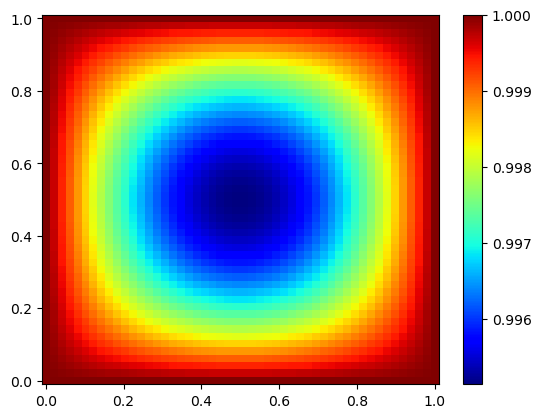

In [5]:
contour = plt.pcolormesh(X, Y, U, cmap='jet')
cbar = plt.colorbar(contour)
formatter = ScalarFormatter(useMathText=False, useOffset=False)
formatter.set_scientific(False)
cbar.ax.yaxis.set_major_formatter(formatter)
plt.show()

The plot is a bit misleading. Given the fixed boundary condition the solution is the constant value 1 everywhere.